In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filepath = '/kaggle/input/reddit-vaccine-myths/reddit_vm.csv'
vaccine_data = pd.read_csv(filepath)

In [3]:
vaccine_data.shape

(1561, 8)

In [4]:
vaccine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561 entries, 0 to 1560
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   title      1561 non-null   object 
 1   score      1561 non-null   int64  
 2   id         1561 non-null   object 
 3   url        460 non-null    object 
 4   comms_num  1561 non-null   int64  
 5   created    1561 non-null   float64
 6   body       1192 non-null   object 
 7   timestamp  1561 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 97.7+ KB


In [5]:
categorical_col, covariate_val = [], []

for i in vaccine_data.columns:
    if vaccine_data[i].dtype == "object":
        categorical_col.append(i)
    else:
        covariate_val.append(i)
        
print("The Categorical features are:", categorical_col)
print("The Covariate features are:", covariate_val)

The Categorical features are: ['title', 'id', 'url', 'body', 'timestamp']
The Covariate features are: ['score', 'comms_num', 'created']


In [6]:
null_value_percent = round((vaccine_data.isnull().sum()/len(vaccine_data))*100,2)
for i in null_value_percent.index:
    print("Null values in", i, "is", null_value_percent[i],"%")

Null values in title is 0.0 %
Null values in score is 0.0 %
Null values in id is 0.0 %
Null values in url is 70.53 %
Null values in comms_num is 0.0 %
Null values in created is 0.0 %
Null values in body is 23.64 %
Null values in timestamp is 0.0 %


In [7]:
vaccine_data['year'] = pd.DatetimeIndex(vaccine_data['timestamp']).year
vaccine_data['month'] = pd.DatetimeIndex(vaccine_data['timestamp']).month

<AxesSubplot:>

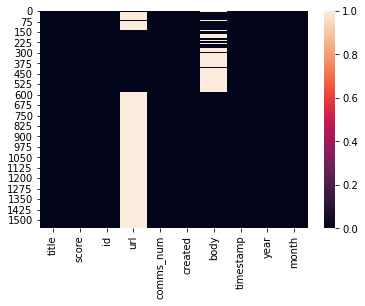

In [8]:
sns.heatmap(vaccine_data.isnull())

<AxesSubplot:>

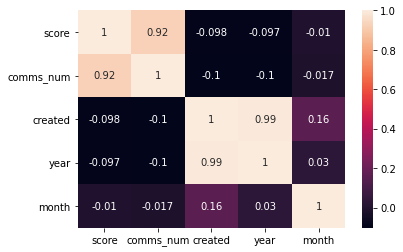

In [9]:
sns.heatmap(vaccine_data.corr(method='pearson'),annot=True)

'year' and 'created' have Pearson Correlation = 0.99 so one of them can be dropped.

'comms_num' and 'score' have Pearson Correlation = 0.92 so one of them can be dropped.

<AxesSubplot:xlabel='comms_num', ylabel='Density'>

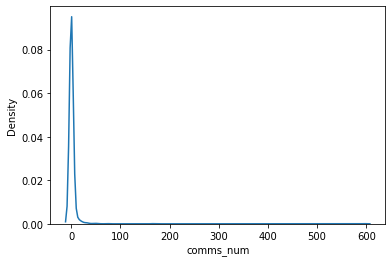

In [10]:
sns.kdeplot(vaccine_data['comms_num'])

In [11]:
vaccine_data=vaccine_data.drop(columns=['url','timestamp','created','comms_num','id'],axis=1)

<AxesSubplot:xlabel='month', ylabel='count'>

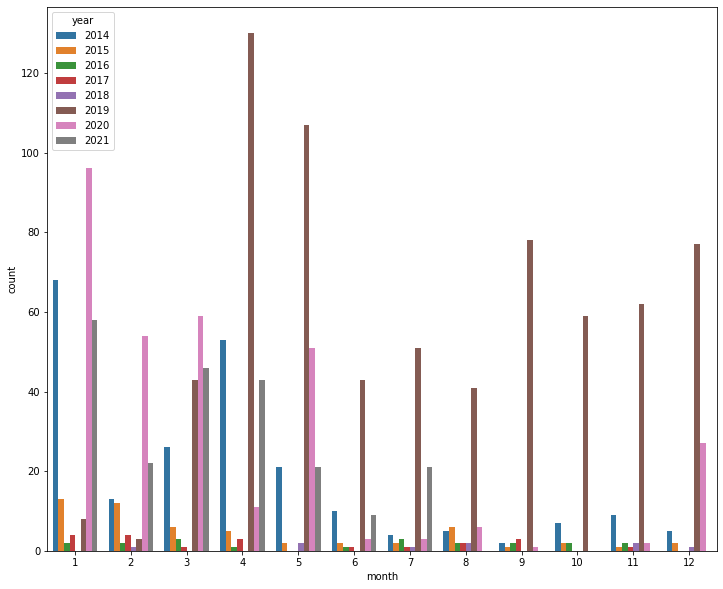

In [12]:
plt.figure(figsize=(12,10))
sns.countplot(data=vaccine_data,x='month',hue='year')

In [13]:
vaccine_data

,title,score,body,year,month
0,Health Canada approves AstraZeneca COVID-19 va...,7,NaN,2021,2
1,COVID-19 in Canada: 'Vaccination passports' a ...,2,NaN,2021,2
2,Coronavirus variants could fuel Canada's third...,6,NaN,2021,2
3,Canadian government to extend COVID-19 emergen...,1,NaN,2021,2
4,Canada: Pfizer is 'extremely committed' to mee...,6,NaN,2021,2
...,...,...,...,...,...
1556,Comment,1,What is thimerosal made of?,2019,4
1557,Comment,2,Compounds aren't forms of elements. That's lit...,2019,4
1558,Comment,5,Your link addresses why it was retracted. If y...,2019,4
1559,Comment,1,"And Wakefield's colleague, John Walker-Smith, ...",2019,4
